In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visul

#from subprocess import check_output
#print(check_output(["ls", "input"]).decode("utf8"))


In [5]:
crimes1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [6]:
crimes = pd.concat([crimes1,crimes2],  ignore_index=False, axis=0)

In [7]:
# rename the STATE/UT column to STATE
crimes.rename(columns={'STATE/UT':'STATE'}, inplace=True)

In [8]:
# delete data sets post concat
del crimes1
del crimes2

In [9]:
print('Dataset is ready....')
# know the shape of dataset
crimes.shape

Dataset is ready....


(9840, 10)

In [10]:
# collect the state names in a list and print
states = crimes.STATE.unique()
print(states)

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry']


In [11]:
# do some data cleansing on state names

for i in range(0, len(states)):
    states[i] = states[i].lower()
    
for j in range(0, len(states)):
    if states[j] == 'a & n islands':
       states[j] = 'a&n islands'
    
    if  states[j] == 'd & n haveli':
        states[j] = 'd&n haveli'
      
print(states)

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamil nadu'
 'tripura' 'uttar pradesh' 'uttarakhand' 'west bengal' 'a&n islands'
 'chandigarh' 'd&n haveli' 'daman & diu' 'delhi' 'lakshadweep'
 'puducherry' 'andhra pradesh' 'arunachal pradesh' 'assam' 'bihar'
 'chhattisgarh' 'goa' 'gujarat' 'haryana' 'himachal pradesh'
 'jammu & kashmir' 'jharkhand' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal' 'a&n islands' 'chandigarh' 'd&n haveli'
 'daman & diu' 'delhi ut' 'lakshadweep' 'puducherry']


In [12]:
# remove duplicate state names from the list
states = np.unique(states).tolist()

print(states)

['a&n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd&n haveli', 'daman & diu', 'delhi', 'delhi ut', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [13]:
# convert the state names to lower
crimes['STATE'] = crimes['STATE'].str.lower()
crimes.head(3)

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0


In [14]:
# filter out the Total crimes for each State & UT

crimes_total = crimes[crimes['DISTRICT'] == 'TOTAL']

In [15]:
# drop DISTRCT Column as we do not intend to use at this point
crimes_total.drop('DISTRICT', axis=1, inplace=True)
# filter out the Total crimes for each State & UT for the year 2001
crimes_total_2001 = crimes_total[crimes_total['Year'] == 2001]
crimes_total_2001.drop('Year', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
# Data of Rape crime committed in the year 2001 per state
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Rape'].values

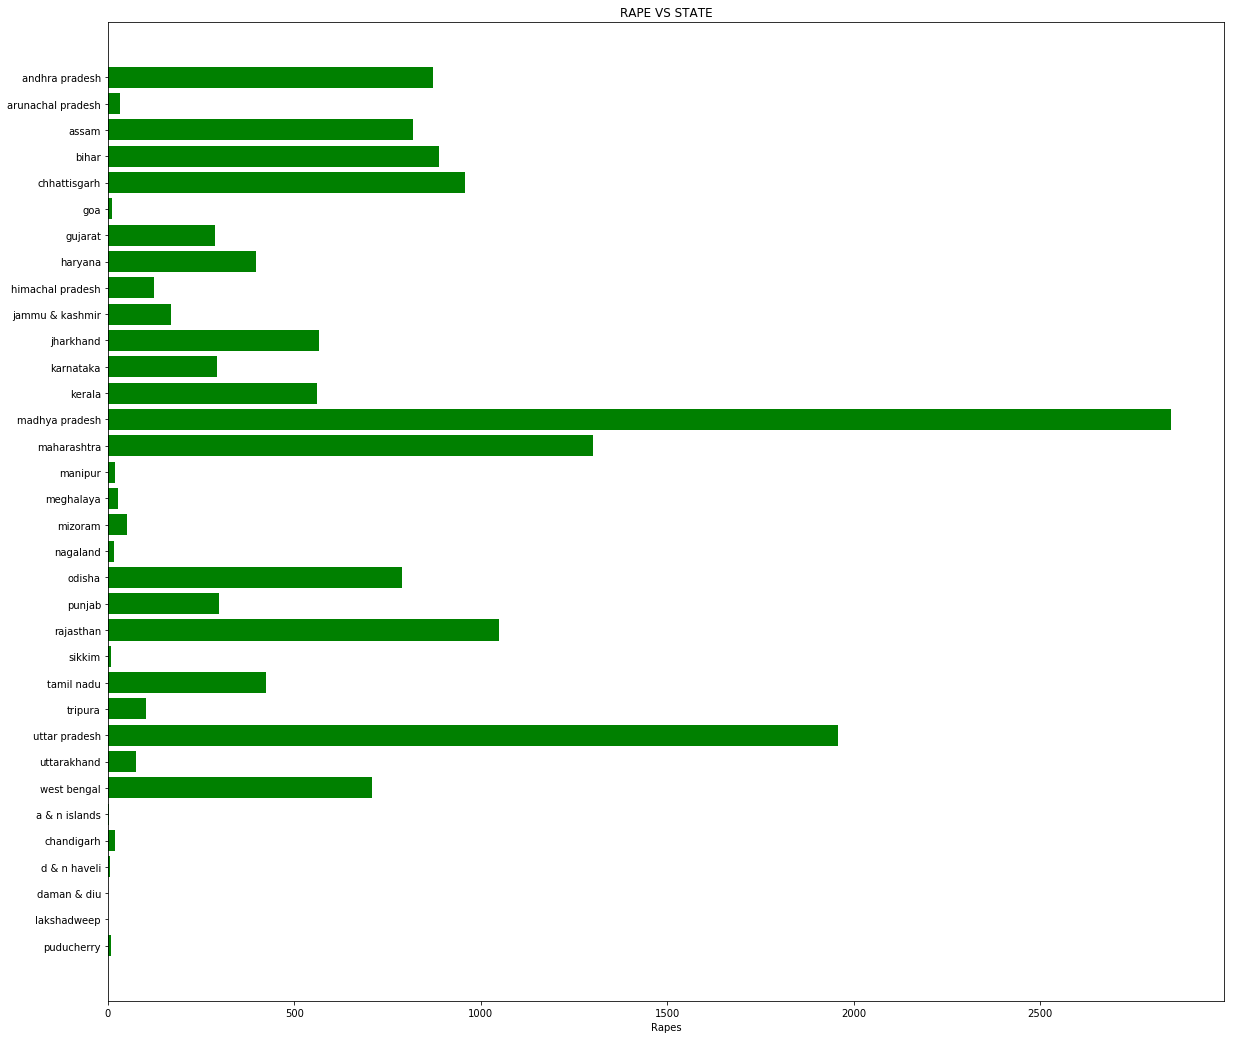

In [17]:
# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Rape'].values
ax.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rapes')
ax.set_title('RAPE VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()

In [18]:
# Any results you write to the current directory are saved as output.
# creating a new data set

crimes_total_women1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes_total_women2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [19]:
crimes_total_women = pd.concat([crimes_total_women1,crimes_total_women2],  ignore_index=False, axis=0)
crimes_total_women.rename(columns={'STATE/UT':'STATE'}, inplace=True)

del crimes_total_women1
del crimes_total_women2

In [20]:
# calculating total crimes of all kinds in each state from 2001 to 2013
crimes_total_women = crimes_total_women[crimes_total_women['DISTRICT'] == 'TOTAL']
crimes_total_women.drop('DISTRICT', axis=1, inplace=True)

crimes_total_women['Total Crimes']= crimes_total_women.iloc[:, -9:-1].sum(axis=1) #Select all Rows and Col = -9:-1

crimes_total_women = crimes_total_women.groupby(['STATE'])['Total Crimes'].sum() #Sum And return crime in particular state

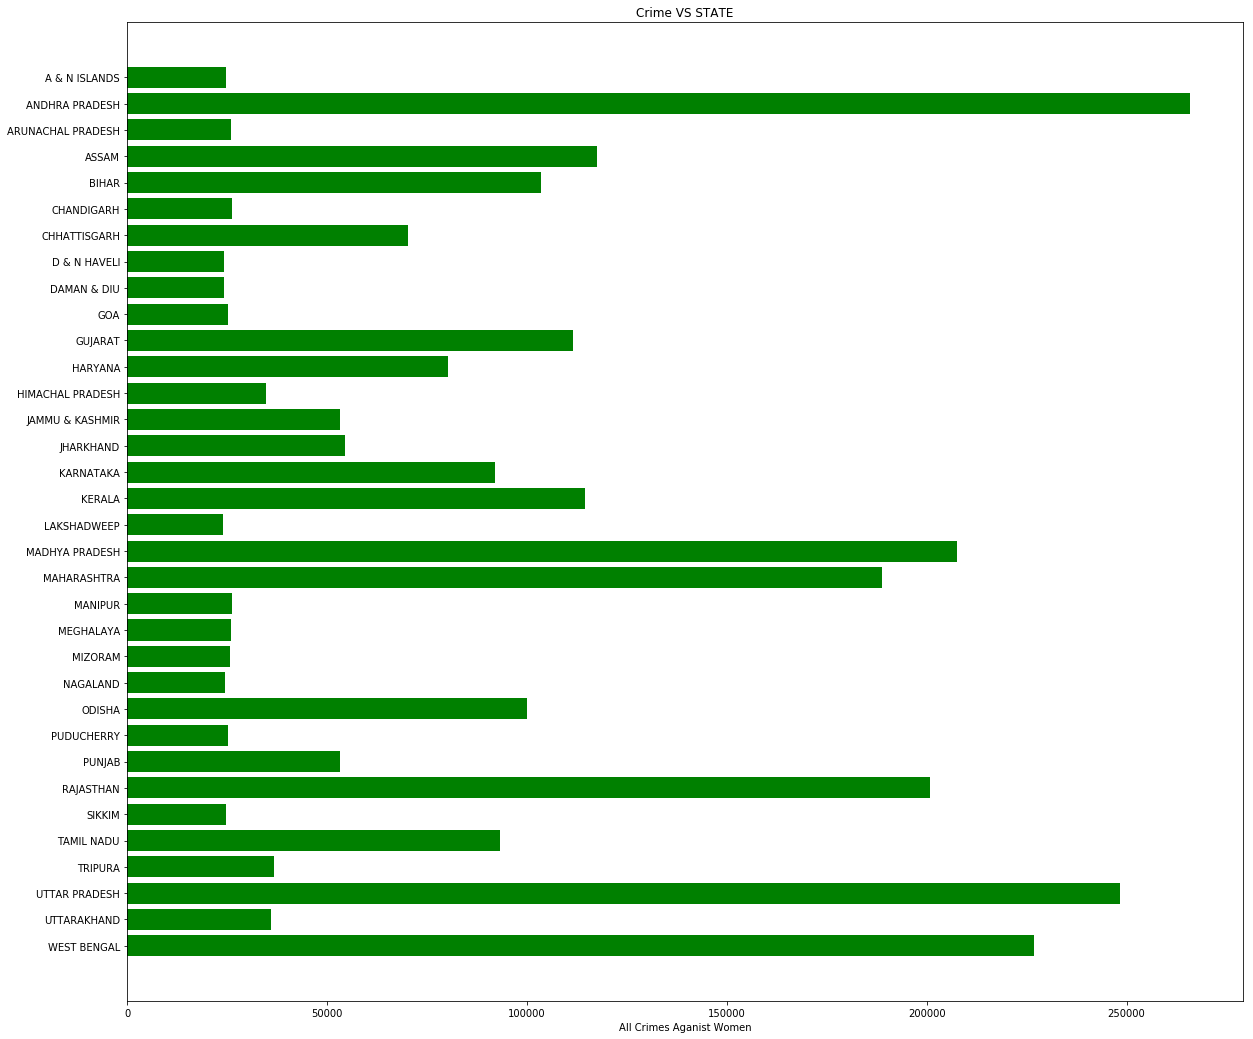

In [21]:
# plot graph of crimes committed on women since 2001-2013 in each state/ UT
fig1, ax1 = plt.subplots()
states = crimes_total_women.index.tolist()  #Gives List of States
y_pos = np.arange(len(states))    # In Numbers
performance = crimes_total_women.tolist()
ax1.barh(y_pos, performance, align='center',color='green', ecolor='black') # Plot a graph in Numerical Form 35/26000
ax1.set_yticks(y_pos)
ax1.set_yticklabels(states)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('All Crimes Aganist Women')
ax1.set_title('Crime VS STATE')
fig1.set_size_inches(20, 18, forward=True)
plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
rape_data = pd.read_csv('input/20_Victims_of_rape.csv')
state_geo = pd.read_csv('input/poptable.csv')
#rape_data.rename(columns={'Area_Name': 'State'}, inplace=True)
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [24]:
state_geo.head()

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973


In [25]:
rape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
Area_Name                    1050 non-null object
Year                         1050 non-null int64
Subgroup                     1050 non-null object
Rape_Cases_Reported          1050 non-null int64
Victims_Above_50_Yrs         1050 non-null int64
Victims_Between_10-14_Yrs    1050 non-null int64
Victims_Between_14-18_Yrs    1050 non-null int64
Victims_Between_18-30_Yrs    1050 non-null int64
Victims_Between_30-50_Yrs    1050 non-null int64
Victims_of_Rape_Total        1050 non-null int64
Victims_Upto_10_Yrs          1050 non-null int64
dtypes: int64(9), object(2)
memory usage: 90.3+ KB


In [26]:
'''def set_value(row_number, assigned_value): 
    return assigned_value[row_number]'''

latitude_mapping = {"Andaman & Nicobar Islands": 11.7400867, "Andhra Pradesh":15.91, "Arunachal Pradesh":28.21, "Assam":26.20, "Bihar":25.09
                , "Chandigarh":30.7333, "Chhattisgarh":21.27, "Dadra & Nagar Haveli":20.1809, "Daman & Diu":20.4283, "Delhi":28.7041, "Goa":15.29, "Gujarat":22.25
                , "Haryana":29.05, "Himachal Pradesh":31.10, "Jammu & Kashmir":33.77, "Jharkhand":23.61, "Karnataka":15.31, "Kerala":10.85,
                "Lakshadweep":10,"Madhya Pradesh":22.97,"Maharashtra":19.75,"Manipur":24.66,"Meghalaya":25.46,"Mizoram":23.16,"Nagaland":26.15,"Odisha":20.95,"Puducherry":11.9416,
                "Punjab":31.14,"Rajasthan":27.02,"Sikkim":27.53,"Tamil Nadu":11.12,"Tripura":23.94,"Uttar Pradesh":26.84,"Uttarakhand":30.06,"West Bengal":22.98}

#event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200} 
    
# Add a new column named 'Price' 
#df['Price'] = df['Event'].apply(set_value, args =(event_dictionary, )) 
#rape_data['Latitude'] = rape_data['Area_Name'].apply(set_value, args=(latitude_mapping))


rape_data['Latitude'] = rape_data['Area_Name'].map(latitude_mapping)
  

#print(rape_data) 

'''for dataset in rape_data.iteritems():
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].map(latitude_mapping)
    #dataset[1] = dataset[1].map(latitude_mapping)
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].fillna(0)'''
    
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Latitude
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0,11.740087
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,11.740087
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0,11.740087
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0,11.740087
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,11.740087


In [27]:
rape_data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
Latitude                     0
dtype: int64

In [28]:
longitude_mapping = {"Andaman & Nicobar Islands": 92.6586, "Andhra Pradesh":79.74, "Arunachal Pradesh":94.72, "Assam":92.93, "Bihar":85.31
                , "Chandigarh":76.7794, "Chhattisgarh":81.86, "Dadra & Nagar Haveli":73.0169, "Daman & Diu":72.8397, "Delhi":77.1025, "Goa":74.12, "Gujarat":71.19
                , "Haryana":76.08, "Himachal Pradesh":77.17, "Jammu & Kashmir":76.57, "Jharkhand":85.27, "Karnataka":75.71, "Kerala":76.27,
                "Lakshadweep":72.1833,"Madhya Pradesh":78.65,"Maharashtra":75.71,"Manipur":93.90,"Meghalaya":91.36,"Mizoram":92.93,"Nagaland":94.56,"Odisha":85.09,"Puducherry":79.8083,
                "Punjab":75.34,"Rajasthan":74.21,"Sikkim":88.51,"Tamil Nadu":78.65,"Tripura":91.98,"Uttar Pradesh":80.94,"Uttarakhand":79.01,"West Bengal":87.85}

rape_data['Longitude'] = rape_data['Area_Name'].map(longitude_mapping)

In [29]:
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Latitude,Longitude
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0,11.740087,92.6586
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,11.740087,92.6586
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0,11.740087,92.6586
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0,11.740087,92.6586
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,11.740087,92.6586


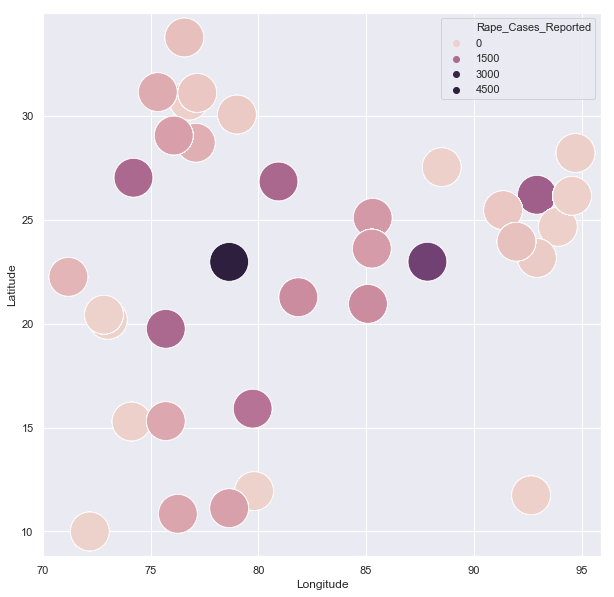

In [30]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x='Longitude', y='Latitude', hue='Rape_Cases_Reported',s=1500, data=rape_data)

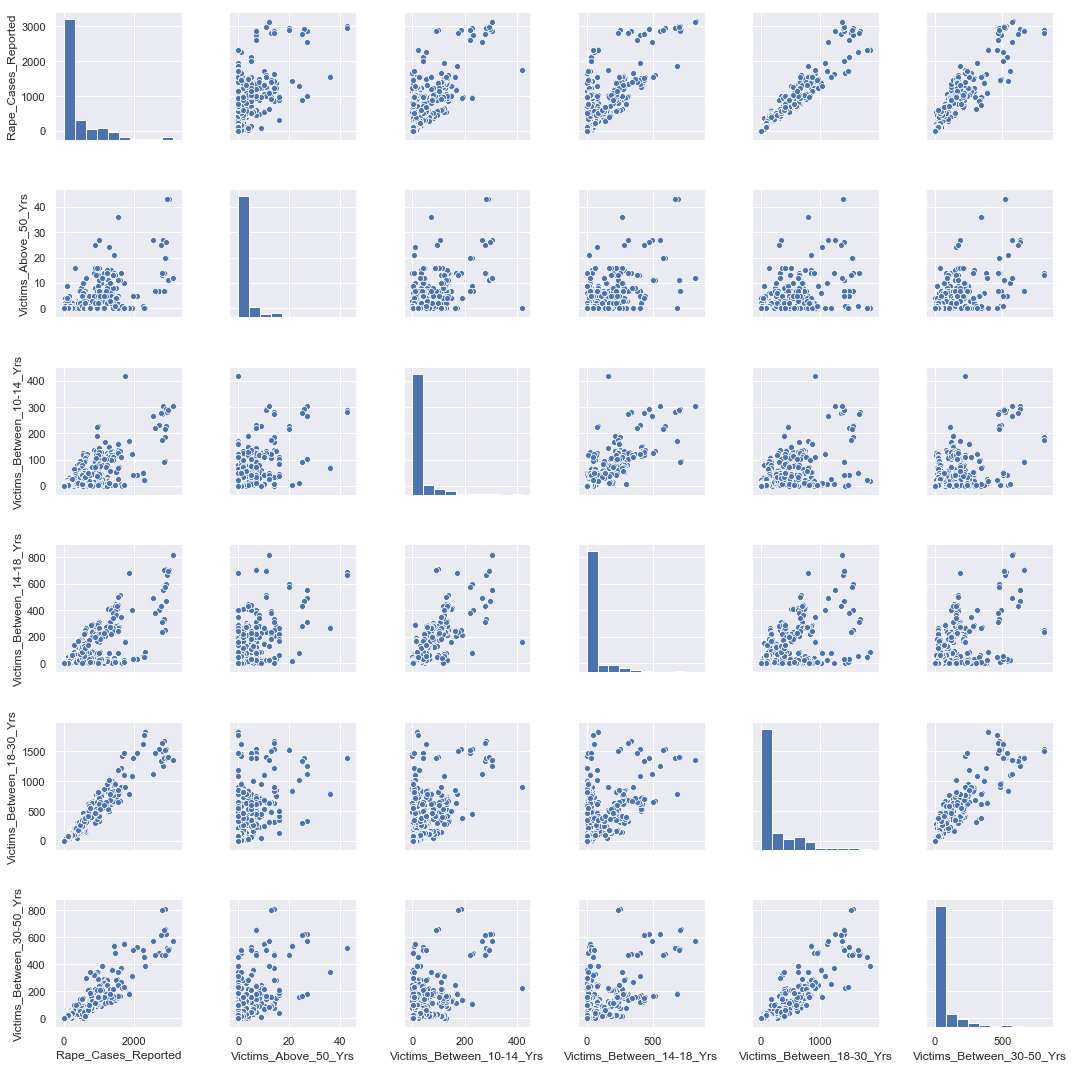

In [31]:
sns.pairplot(rape_data, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"])
#correlTION B/W VAR

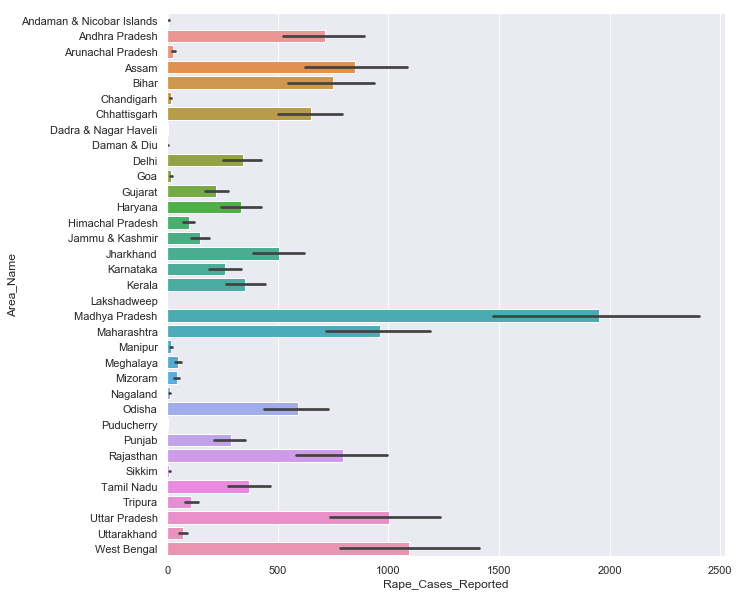

In [32]:
sns.barplot(x="Rape_Cases_Reported", y="Area_Name", data=rape_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


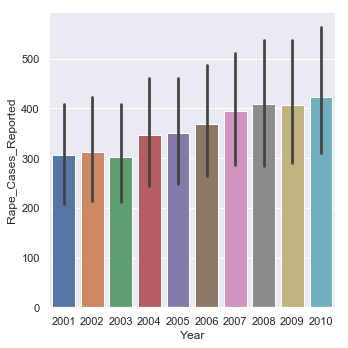

In [33]:
sns.factorplot(x="Year", y="Rape_Cases_Reported", data=rape_data, kind='bar')

In [34]:
dw_crime_against_women = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')
dw_crime_against_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0
5,Andhra Pradesh,EAST GODAVARI,2013,74,33,15,352,222,483,0
6,Andhra Pradesh,GUNTAKAL RLY.,2013,0,0,0,3,2,0,0
7,Andhra Pradesh,GUNTUR,2013,38,54,16,296,135,608,0
8,Andhra Pradesh,GUNTUR URBAN,2013,28,34,7,124,93,326,0
9,Andhra Pradesh,HYDERABAD CITY,2013,101,52,39,225,90,1480,0


In [35]:
dw_crime_against_women.DISTRICT.unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'CYBERABAD',
       'EAST GODAVARI', 'GUNTAKAL RLY.', 'GUNTUR', 'GUNTUR URBAN',
       'HYDERABAD CITY', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD',
       'PRAKASHAM', 'RAJAHMUNDRY', 'RANGA REDDY', 'SECUNDERABAD RLY.',
       'SRIKAKULAM', 'TIRUPATHI URBAN', 'VIJAYAWADA CITY',
       'VIJAYAWADA RLY.', 'VISAKHA RURAL', 'VISAKHAPATNAM',
       'VIZIANAGARAM', 'WARANGAL', 'WARANGAL URBAN', 'WEST GODAVARI',
       'ZZ TOTAL', 'ANJAW', 'CHANGLANG', 'DIBANG VALLEY', 'K/KUMEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'LONGDING', 'PAPUM PARE',
       'RURAL', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP',
       'UPPER DIBANG VALLEY', 'BAKSA', 'BARPETA', 'BIEO', 'BONGAIGAON',
       'C.I.D.', 'CACHAR', 'CHIRANG', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT', 'GU

In [36]:
#dw_crime_against_women.to_csv(r'../File_Name.csv')
dw_crime_against_women.to_csv('mycsvfile.csv',index=False)

In [37]:
data = pd.read_csv('mycsvfile.csv')

In [38]:
data

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0
5,Andhra Pradesh,EAST GODAVARI,2013,74,33,15,352,222,483,0
6,Andhra Pradesh,GUNTAKAL RLY.,2013,0,0,0,3,2,0,0
7,Andhra Pradesh,GUNTUR,2013,38,54,16,296,135,608,0
8,Andhra Pradesh,GUNTUR URBAN,2013,28,34,7,124,93,326,0
9,Andhra Pradesh,HYDERABAD CITY,2013,101,52,39,225,90,1480,0


# Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [40]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('input/communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y) #tRAIN DT CLASSIFIER
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)


In [42]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores)
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648
cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686
cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [43]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


In [44]:
DT_acc = accuracy_score(Y,y_pred)*100
#print(DT_acc)

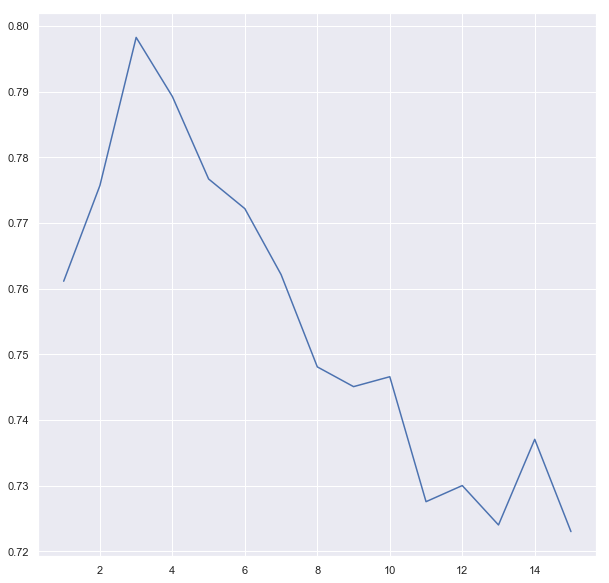

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7892412060301508, 0.7766834170854271, 0.7721633165829147, 0.7621231155778896, 0.74806783919598, 0.7450603015075378, 0.746570351758794, 0.7275402010050251, 0.7299949748743718, 0.7239949748743718, 0.737037688442211, 0.7229849246231156]


In [45]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [46]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29  5  3 44]
4_max_normalized_feature is  [0.02427439 0.0496583  0.08646058 0.3620976 ]
29
feature_name[index] is  PctLess9thGrade
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


# NaiveBayes-Gaussian

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)

mislabel num is  442


In [48]:
ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])


ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv


In [49]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.76  0.744 0.56  0.528 0.768 0.576 0.76  0.728]
cross_val_recall_avg is  0.692


In [50]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 77.82237832413446
Precesion is 93.16239316239316
Recall is 69.76


In [51]:
GNB_acc = accuracy_score(Y,y_pred)*100

# K-NN

In [52]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('input/communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

In [53]:
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

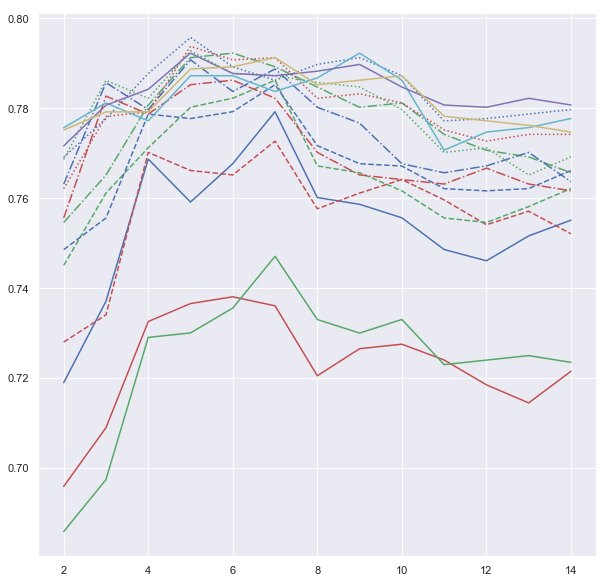

In [54]:
plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [55]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_
pca.explained_variance_ratio_
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031454,  0.614929  , -0.78039932],
       [-1.19933196, -0.90092286,  0.31801595,  0.06578607,  0.08519104],
       [-1.25540273, -0.45223119, -0.37326947, -0.57765156, -0.34191673],
       ...,
       [-0.39828125, -0.04847062, -0.72054899,  1.84903699,  0.50341936],
       [-0.06739216, -0.87415147,  0.57794267,  0.14245355, -0.03894187],
       [-0.53794345, -0.94270676, -0.04992508,  0.22885671,  0.51675862]])

In [56]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [57]:
KNN_acc = accuracy_score(Y,y_pred)*100

In [58]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.57286432160804
Cross validation precision is 85.35884460774638
Cross validation recall is 81.60000000000001


# Boosted Decesion Tree

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)

In [61]:
AdaBoost.fit(initial, Y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=400, random_state=None)

In [62]:
prediction = AdaBoost.score(initial, Y)

In [63]:
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  97.99297541394883 %


In [64]:
BoostedDT = prediction*100

# Comparsion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


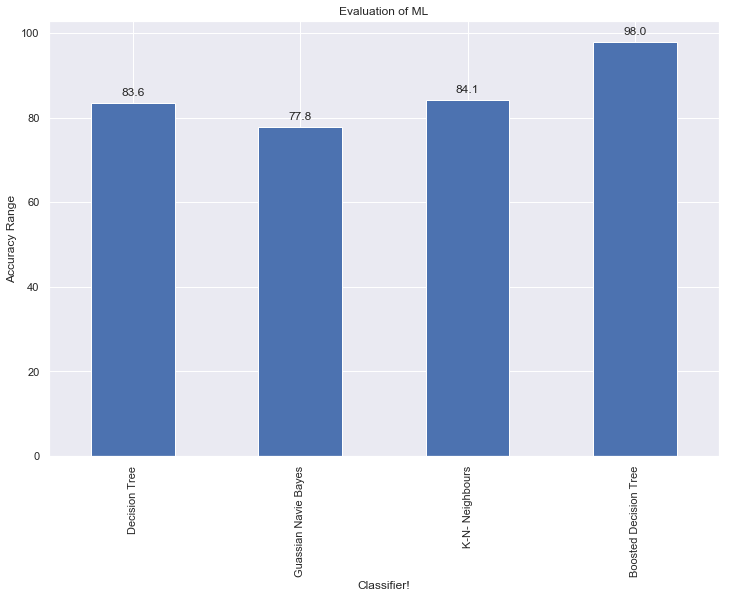

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [DT_acc,GNB_acc,KNN_acc,BoostedDT]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['Decision Tree', 'Guassian Navie Bayes','K-N- Neighbours','Boosted Decision Tree']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")